# PROJECT 2- Thera Bank Data Analysis

## Aaron Coteff 10.10.2020

### GreatLearning AI/ML

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
# IMPORT DATASET

df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# CHECK SHAPE

df.shape

(5000, 14)

In [4]:
# CHECK DATA TYPES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# CHECK NULL VALUES

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# CHECK STATISTICAL SUMMARY

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
# CHECK UNIQUE VALUES

df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
# CHECK FOR DUPLICATES

df[df.duplicated() == 1].any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [9]:
# DROP ID COLUMN AND ESTABLISH NEW DATAFRAME

df_loan = df.drop('ID', axis = 1)
df_loan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
# CHECK INCORRECT IMPUTATION

df_loan[df_loan['Experience'] < 0].count()

Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [11]:
# NEGATIVE VALUES FOR EXPERIENCES ARE INCORRECT

df_loan[df_loan['Experience'] < 0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
# DROP INCORRECT DATA

df_loan = df_loan.drop(df[df_loan.Experience < 0].index)

In [13]:
# IMPORT CALIFORNIA ZIPCODES DATASET

ca_zips = pd.read_csv(filepath_or_buffer = 'https://data.ca.gov/dataset/adcd5543-89c5-44ce-9b0d-cc351c14be6f/resource/781baa91-14e4-45ff-b842-72cad6de7ebf/download/zip-code-list.csv')
ca_zips.head()

,zip_code
0,90001
1,90002
2,90003
3,90004
4,90005


In [14]:
# CHECK SIZE

ca_zips.shape

(2664, 1)

In [15]:
# CHECK UNIQUE VALUES

ca_zips.nunique()

zip_code    2664
dtype: int64

In [16]:
# COMPARE ZIPCODES

df_loan['ZIP Code'].isin(ca_zips['zip_code']).value_counts()

True     4915
False      33
Name: ZIP Code, dtype: int64

In [17]:
# ESTABLISH DATASET OF DATA WITH INCORRECT ZIPCODES

df_rz = df_loan[~df_loan['ZIP Code'].isin(ca_zips['zip_code'])]
df_rz.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
106,43,17,69,92717,4,2.9,1,0,0,0,0,1,1
172,38,13,171,92717,2,7.8,1,0,0,0,0,1,0
184,52,26,63,92717,2,1.5,2,0,0,1,0,1,0
321,44,20,101,92717,3,4.4,2,82,1,0,0,0,0
366,50,24,35,92717,1,0.3,3,0,0,0,0,1,0


In [18]:
# CHECK SHAPE TO CONFIRM 

df_rz.shape

(33, 13)

In [19]:
# THESE ZIPCODES ARE NOT IN CALIFORNIA

df_rz['ZIP Code'].unique()

array([92717,  9307, 92634, 96651])

In [20]:
# DROP THESE ZIPCODES FROM DATAFRAME

df_loan.drop(df_rz.index, axis=0,inplace=True)

In [21]:
# RESET DATAFRAME INDEX

df_loan.reset_index(drop = True, inplace = True)

In [22]:
# COUNT OF UNIQUE VALUES BY COLUMN

print('Number of unique values by column:')
print()
for i in df_loan.columns:
    print(i,':', df_loan[i].nunique())

Number of unique values by column:

Age : 44
Experience : 44
Income : 162
ZIP Code : 463
Family : 4
CCAvg : 107
Education : 3
Mortgage : 347
Personal Loan : 2
Securities Account : 2
CD Account : 2
Online : 2
CreditCard : 2


In [23]:
# COUNT OF INDIVIDUALS WITH ZERO MORGAGE

print('NUMBER OF INDIVIDUALS WITH ZERO MORGAGE:')
print(len(df_loan[df_loan['Mortgage'] == 0]))

NUMBER OF INDIVIDUALS WITH ZERO MORGAGE:
3396


In [24]:
# COUNT OF INDIVIDUALS WITH ZERO CREDIT SPENDING PER MONTH

print('NUMBER OF INDIVIDUALS WITH ZERO CREDIT SPENDING PER MONTH:')
print(len(df_loan[df_loan['CCAvg'] == 0]))

NUMBER OF INDIVIDUALS WITH ZERO CREDIT SPENDING PER MONTH:
106


In [25]:
# CATEGORICAL COUNTS

print('Counts of categorical values:')
for column in df_loan[['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]:
    print("\n" + column)
    print(df_loan[column].value_counts())

Counts of categorical values:

Family
1    1458
2    1268
4    1196
3     993
Name: Family, dtype: int64

Education
1    2070
3    1471
2    1374
Name: Education, dtype: int64

Personal Loan
0    4438
1     477
Name: Personal Loan, dtype: int64

Securities Account
0    4403
1     512
Name: Securities Account, dtype: int64

CD Account
0    4613
1     302
Name: CD Account, dtype: int64

Online
1    2935
0    1980
Name: Online, dtype: int64

CreditCard
0    3472
1    1443
Name: CreditCard, dtype: int64


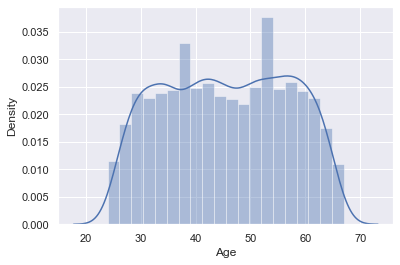

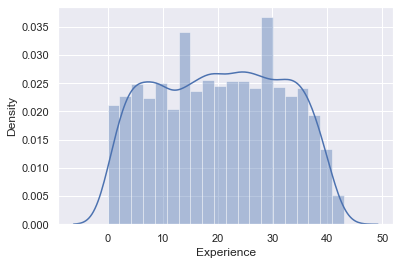

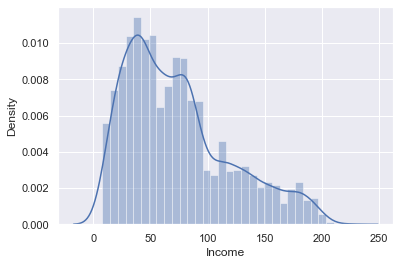

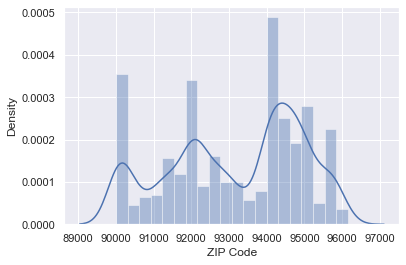

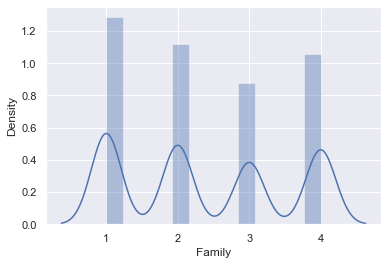

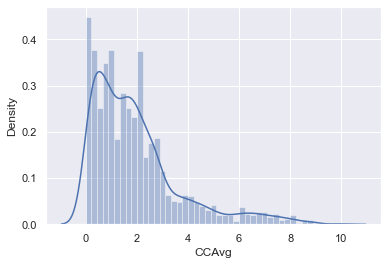

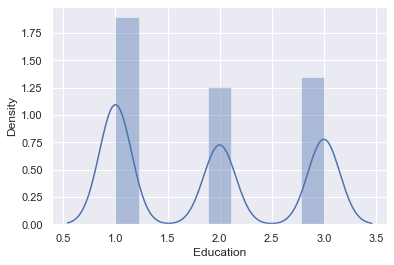

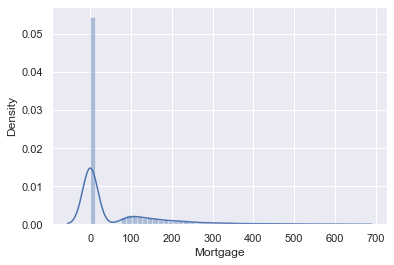

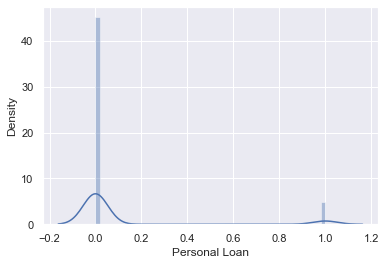

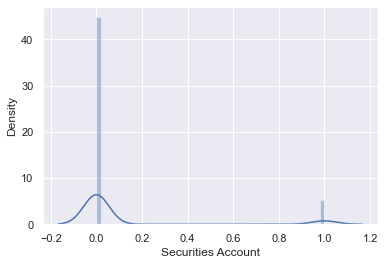

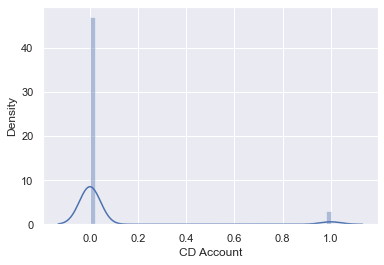

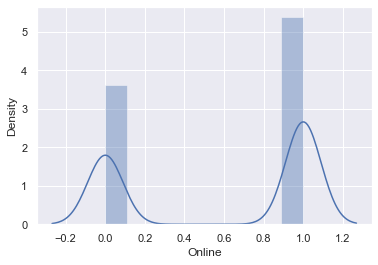

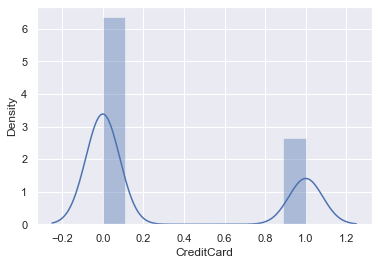

In [26]:
# PRINT UNIVARIATE DATA

for i in ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    sns.distplot(df_loan[i])
    plt.show()

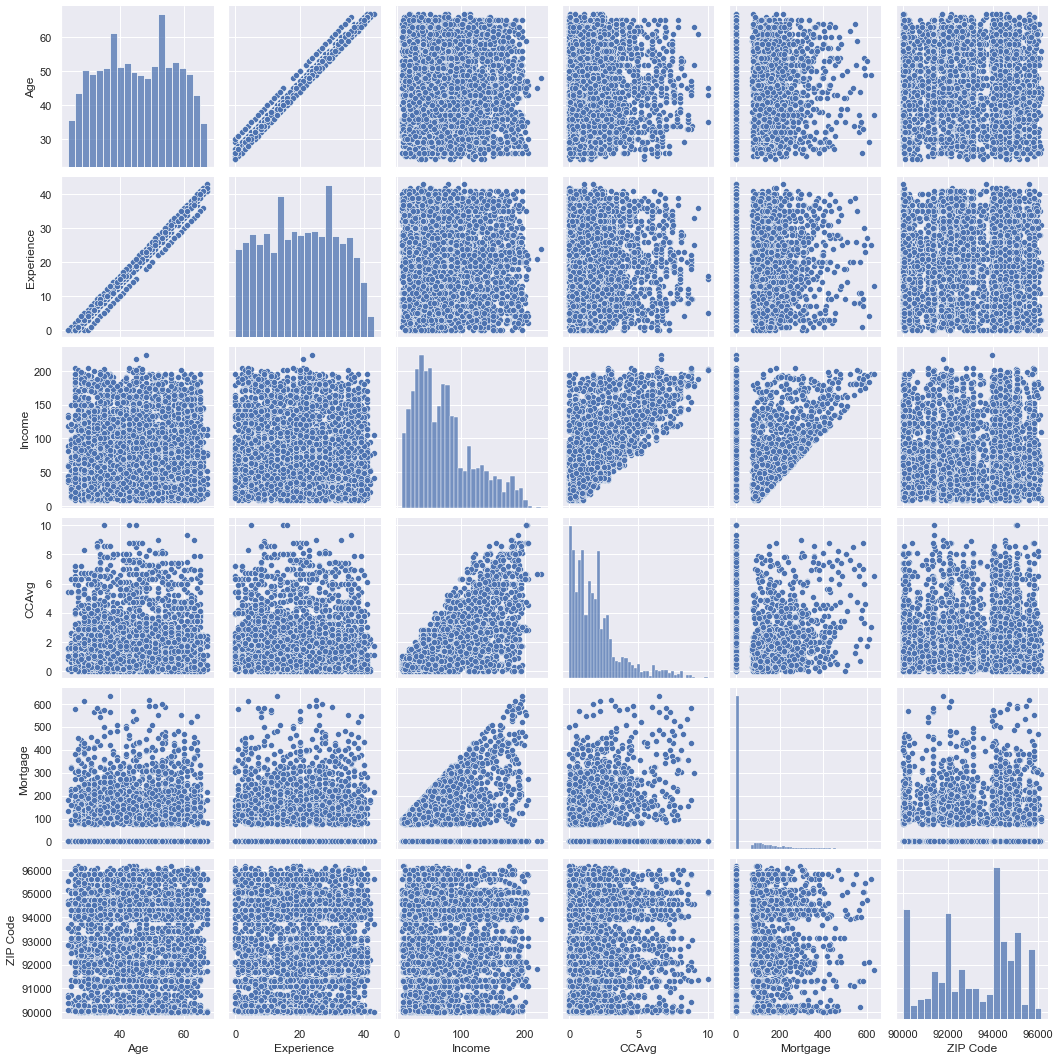

In [27]:
# PRINT BIVARIATE DATA (OMITTING CATEGORICAL DATA)

sns.pairplot(data = df_loan[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIP Code']]);

In [28]:
# ADDITIONAL DATA PERSPECTIVES

In [29]:
# INCOME AND CREDIT USE APPEAR TO BE CONSIDERABLE INDICATORS 

df_loan.groupby(['Personal Loan']).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.619648,20.392744,66.245155,93167.885534,2.368409,1.725234,1.840018,52.079090,0.101848,0.036503,0.595764,0.293150
1,45.106918,19.884696,144.893082,93155.945493,2.612159,3.897484,2.232704,100.677149,0.125786,0.293501,0.610063,0.297694


In [30]:
df_loan.groupby(['Personal Loan']).median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,46,20,59,93524,2,1.4,2,0,0,0,1,0
1,45,20,143,93407,3,3.8,2,0,0,0,1,0


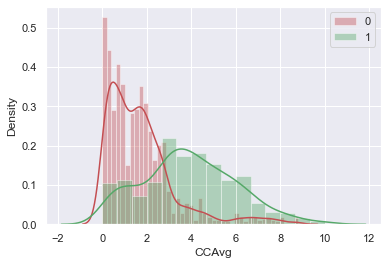

In [31]:
# INDIVIDUALS WITH PERSONAL LOANS APPEAR TO USE CREDIT MORE

sns.distplot(df_loan[df_loan['Personal Loan']==0]['CCAvg'],color='r',label=0)
sns.distplot(df_loan[df_loan['Personal Loan']==1]['CCAvg'],color='g',label=1)
plt.legend()
plt.show()

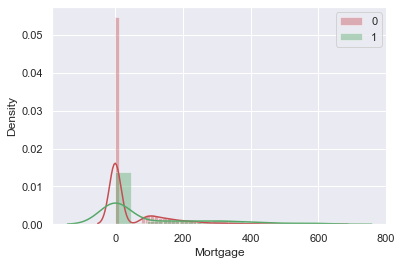

In [32]:
# MORGAGE VALUES DO NOT SEEM TO SHOW SIGNIFICANT WEIGHT

sns.distplot(df_loan[df_loan['Personal Loan']==0]['Mortgage'],color='r',label=0)
sns.distplot(df_loan[df_loan['Personal Loan']==1]['Mortgage'],color='g',label=1)
plt.legend()
plt.show()

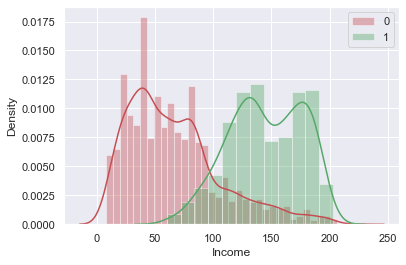

In [33]:
# INCOME IS A SIGNIFICANT FACTOR

sns.distplot(df_loan[df_loan['Personal Loan']==0]['Income'],color='r',label=0)
sns.distplot(df_loan[df_loan['Personal Loan']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

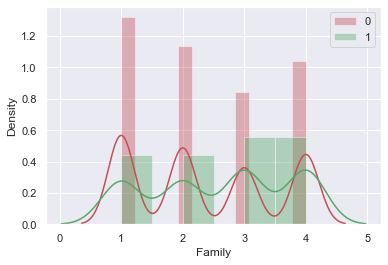

In [34]:
# FAMILY SIZE IS IN AN INTERESTING RELATIONSHIP WITH LOAN STATUS

sns.distplot(df_loan[df_loan['Personal Loan']==0]['Family'],color='r',label=0)
sns.distplot(df_loan[df_loan['Personal Loan']==1]['Family'],color='g',label=1)
plt.legend()
plt.show()

In [35]:
pd.crosstab(df_loan['Family'], df_loan['Personal Loan'], normalize = 'index')

Personal Loan,0,1
Family,,
1,0.927298,0.072702
2,0.916404,0.083596
3,0.867069,0.132931
4,0.888796,0.111204


In [36]:
# PREPARE DATA FOR MORE ACCURATE LEARNING

df_loan['ZIP Code'] = df_loan['ZIP Code'].astype('category')
df_loan['CreditCard'] = df_loan['CreditCard'].astype('category')
df_loan['Online'] = df_loan['Online'].astype('category')
df_loan['CD Account'] = df_loan['CD Account'].astype('category')
df_loan['Securities Account'] = df_loan['Securities Account'].astype('category')
df_loan['Education'] = df_loan['Education'].astype('category')
df_loan['Family'] = df_loan['Family'].astype('category')

In [37]:
# REMOVE TARGET VARIABLE FROM DATASET

X = df_loan.drop('Personal Loan', axis = 1)
Y = df_loan['Personal Loan'].astype('category')

In [38]:
# CREATE DUMMIES 

X = pd.get_dummies(X, drop_first = True)
X.head()

,Age,Experience,Income,CCAvg,Mortgage,ZIP Code_90007,ZIP Code_90009,ZIP Code_90011,ZIP Code_90016,ZIP Code_90018,ZIP Code_90019,ZIP Code_90024,ZIP Code_90025,ZIP Code_90027,ZIP Code_90028,ZIP Code_90029,ZIP Code_90032,ZIP Code_90033,ZIP Code_90034,ZIP Code_90035,ZIP Code_90036,ZIP Code_90037,ZIP Code_90041,ZIP Code_90044,ZIP Code_90045,ZIP Code_90048,ZIP Code_90049,ZIP Code_90057,ZIP Code_90058,ZIP Code_90059,ZIP Code_90064,ZIP Code_90065,ZIP Code_90066,ZIP Code_90068,ZIP Code_90071,ZIP Code_90073,ZIP Code_90086,ZIP Code_90089,ZIP Code_90095,ZIP Code_90210,ZIP Code_90212,ZIP Code_90230,ZIP Code_90232,ZIP Code_90245,ZIP Code_90250,ZIP Code_90254,ZIP Code_90266,ZIP Code_90272,ZIP Code_90274,ZIP Code_90275,ZIP Code_90277,ZIP Code_90280,ZIP Code_90291,ZIP Code_90304,ZIP Code_90401,ZIP Code_90404,ZIP Code_90405,ZIP Code_90502,ZIP Code_90503,ZIP Code_90504,ZIP Code_90505,ZIP Code_90509,ZIP Code_90601,ZIP Code_90623,ZIP Code_90630,ZIP Code_90638,ZIP Code_90639,ZIP Code_90640,ZIP Code_90650,ZIP Code_90717,ZIP Code_90720,ZIP Code_90740,ZIP Code_90745,ZIP Code_90747,ZIP Code_90755,ZIP Code_90813,ZIP Code_90840,ZIP Code_91006,ZIP Code_91007,ZIP Code_91016,ZIP Code_91024,ZIP Code_91030,ZIP Code_91040,ZIP Code_91101,ZIP Code_91103,ZIP Code_91105,ZIP Code_91107,ZIP Code_91109,ZIP Code_91116,ZIP Code_91125,ZIP Code_91129,ZIP Code_91203,ZIP Code_91207,ZIP Code_91301,ZIP Code_91302,ZIP Code_91304,ZIP Code_91311,ZIP Code_91320,ZIP Code_91326,ZIP Code_91330,ZIP Code_91335,ZIP Code_91342,ZIP Code_91343,ZIP Code_91345,ZIP Code_91355,ZIP Code_91360,ZIP Code_91361,ZIP Code_91365,ZIP Code_91367,ZIP Code_91380,ZIP Code_91401,ZIP Code_91423,ZIP Code_91604,ZIP Code_91605,ZIP Code_91614,ZIP Code_91706,ZIP Code_91709,ZIP Code_91710,ZIP Code_91711,ZIP Code_91730,ZIP Code_91741,ZIP Code_91745,ZIP Code_91754,ZIP Code_91763,ZIP Code_91765,ZIP Code_91768,ZIP Code_91770,ZIP Code_91773,ZIP Code_91775,ZIP Code_91784,ZIP Code_91791,ZIP Code_91801,ZIP Code_91902,ZIP Code_91910,ZIP Code_91911,ZIP Code_91941,ZIP Code_91942,ZIP Code_91950,ZIP Code_92007,ZIP Code_92008,ZIP Code_92009,ZIP Code_92024,ZIP Code_92028,ZIP Code_92029,ZIP Code_92037,ZIP Code_92038,ZIP Code_92054,ZIP Code_92056,ZIP Code_92064,ZIP Code_92068,ZIP Code_92069,ZIP Code_92084,ZIP Code_92093,ZIP Code_92096,ZIP Code_92101,ZIP Code_92103,ZIP Code_92104,ZIP Code_92106,ZIP Code_92109,ZIP Code_92110,ZIP Code_92115,ZIP Code_92116,ZIP Code_92120,ZIP Code_92121,ZIP Code_92122,ZIP Code_92123,ZIP Code_92124,ZIP Code_92126,ZIP Code_92129,ZIP Code_92130,ZIP Code_92131,ZIP Code_92152,ZIP Code_92154,ZIP Code_92161,ZIP Code_92173,ZIP Code_92177,ZIP Code_92182,ZIP Code_92192,ZIP Code_92220,ZIP Code_92251,ZIP Code_92325,ZIP Code_92333,ZIP Code_92346,ZIP Code_92350,ZIP Code_92354,ZIP Code_92373,ZIP Code_92374,ZIP Code_92399,ZIP Code_92407,ZIP Code_92507,ZIP Code_92518,ZIP Code_92521,ZIP Code_92606,ZIP Code_92612,ZIP Code_92614,ZIP Code_92624,ZIP Code_92626,ZIP Code_92630,ZIP Code_92646,ZIP Code_92647,ZIP Code_92648,ZIP Code_92653,ZIP Code_92660,ZIP Code_92661,ZIP Code_92672,ZIP Code_92673,ZIP Code_92675,ZIP Code_92677,ZIP Code_92691,ZIP Code_92692,ZIP Code_92694,ZIP Code_92697,ZIP Code_92703,ZIP Code_92704,ZIP Code_92705,ZIP Code_92709,ZIP Code_92735,ZIP Code_92780,ZIP Code_92806,ZIP Code_92807,ZIP Code_92821,ZIP Code_92831,ZIP Code_92833,ZIP Code_92834,ZIP Code_92835,ZIP Code_92843,ZIP Code_92866,ZIP Code_92867,ZIP Code_92868,ZIP Code_92870,ZIP Code_92886,ZIP Code_93003,ZIP Code_93009,ZIP Code_93010,ZIP Code_93014,ZIP Code_93022,ZIP Code_93023,ZIP Code_93033,ZIP Code_93063,ZIP Code_93065,ZIP Code_93101,ZIP Code_93105,ZIP Code_93106,ZIP Code_93107,ZIP Code_93108,ZIP Code_93109,ZIP Code_93111,ZIP Code_93117,ZIP Code_93118,ZIP Code_93302,ZIP Code_93305,ZIP Code_93311,ZIP Code_93401,ZIP Code_93403,ZIP Code_93407,ZIP Code_93437,ZIP Code_93460,ZIP Code_93524,ZIP Code_93555,ZIP Code_93561,ZIP Code_93611,ZIP Code_93657,ZIP Code_93711,ZIP Code_93720,ZIP Code_93727,ZIP Code_93907,ZIP Code_93933,ZIP Code_93940,ZIP Code_93943,ZI

In [39]:
# ESTABLISH TRAINING AND TESTING DATA

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42, stratify = X['Education_2'])

In [40]:
# INITIATE LOGISTIC REGRESSION

logreg = LogisticRegression(max_iter = 5000, random_state = 42)
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)


TRAINING ACCURACY: 0.9662790697674418

TESTING ACCURACY: 0.9613559322033899

CONFUSION MATRIX:


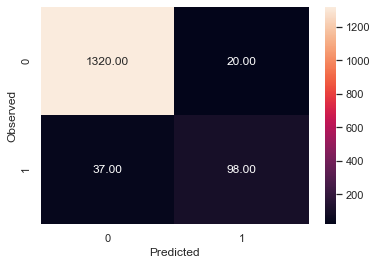


RECALL: 0.725925925925926

PRECISION: 0.8305084745762712

F1 SCORE: 0.7747035573122532

ROC AUC SCORE: 0.8555002763957986


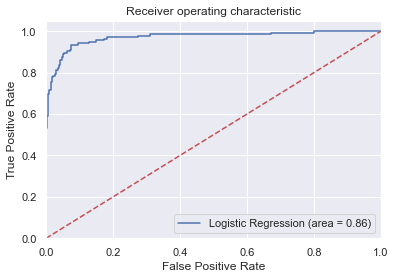

In [41]:
# SHOW METRICS OF MODEL'S PERFORMANCE

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = [0,1], yticklabels = [0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print()
print('TRAINING ACCURACY:', logreg.score(X_train,y_train))  
print()
print('TESTING ACCURACY:', logreg.score(X_test, y_test))
print()
print('CONFUSION MATRIX:')
draw_cm(y_test,y_predict)
print()
print('RECALL:', recall_score(y_test,y_predict))
print()
print('PRECISION:', precision_score(y_test,y_predict))
print()
print('F1 SCORE:', f1_score(y_test,y_predict))
print()
print('ROC AUC SCORE:', roc_auc_score(y_test,y_predict))

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [42]:
# FEATURE IMPORTANCE or COEFFICIENTS 

fi = pd.DataFrame()
fi['Columns'] = X_train.columns
fi['Coefficients'] = np.round(abs(logreg.coef_[0]), 6)
fi.sort_values(by ='Coefficients', ascending=False)

,Columns,Coefficients
471,Education_3,3.282459
470,Education_2,3.041065
473,CD Account_1,2.983859
26,ZIP Code_90049,1.909264
468,Family_3,1.770457
...,...,...
33,ZIP Code_90068,0.000000
130,ZIP Code_91791,0.000000
381,ZIP Code_94970,0.000000
173,ZIP Code_92161,0.000000


In [43]:
# SHOW ROWS WHERE PREDICTED CLASS NOT EQUAL TO OBSERVED CLASS

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z[z['Observed Loan Status'] != z['Predicted Loan Status']]

,Age,Experience,Income,CCAvg,Mortgage,ZIP Code_90007,ZIP Code_90009,ZIP Code_90011,ZIP Code_90016,ZIP Code_90018,ZIP Code_90019,ZIP Code_90024,ZIP Code_90025,ZIP Code_90027,ZIP Code_90028,ZIP Code_90029,ZIP Code_90032,ZIP Code_90033,ZIP Code_90034,ZIP Code_90035,ZIP Code_90036,ZIP Code_90037,ZIP Code_90041,ZIP Code_90044,ZIP Code_90045,ZIP Code_90048,ZIP Code_90049,ZIP Code_90057,ZIP Code_90058,ZIP Code_90059,ZIP Code_90064,ZIP Code_90065,ZIP Code_90066,ZIP Code_90068,ZIP Code_90071,ZIP Code_90073,ZIP Code_90086,ZIP Code_90089,ZIP Code_90095,ZIP Code_90210,ZIP Code_90212,ZIP Code_90230,ZIP Code_90232,ZIP Code_90245,ZIP Code_90250,ZIP Code_90254,ZIP Code_90266,ZIP Code_90272,ZIP Code_90274,ZIP Code_90275,ZIP Code_90277,ZIP Code_90280,ZIP Code_90291,ZIP Code_90304,ZIP Code_90401,ZIP Code_90404,ZIP Code_90405,ZIP Code_90502,ZIP Code_90503,ZIP Code_90504,ZIP Code_90505,ZIP Code_90509,ZIP Code_90601,ZIP Code_90623,ZIP Code_90630,ZIP Code_90638,ZIP Code_90639,ZIP Code_90640,ZIP Code_90650,ZIP Code_90717,ZIP Code_90720,ZIP Code_90740,ZIP Code_90745,ZIP Code_90747,ZIP Code_90755,ZIP Code_90813,ZIP Code_90840,ZIP Code_91006,ZIP Code_91007,ZIP Code_91016,ZIP Code_91024,ZIP Code_91030,ZIP Code_91040,ZIP Code_91101,ZIP Code_91103,ZIP Code_91105,ZIP Code_91107,ZIP Code_91109,ZIP Code_91116,ZIP Code_91125,ZIP Code_91129,ZIP Code_91203,ZIP Code_91207,ZIP Code_91301,ZIP Code_91302,ZIP Code_91304,ZIP Code_91311,ZIP Code_91320,ZIP Code_91326,ZIP Code_91330,ZIP Code_91335,ZIP Code_91342,ZIP Code_91343,ZIP Code_91345,ZIP Code_91355,ZIP Code_91360,ZIP Code_91361,ZIP Code_91365,ZIP Code_91367,ZIP Code_91380,ZIP Code_91401,ZIP Code_91423,ZIP Code_91604,ZIP Code_91605,ZIP Code_91614,ZIP Code_91706,ZIP Code_91709,ZIP Code_91710,ZIP Code_91711,ZIP Code_91730,ZIP Code_91741,ZIP Code_91745,ZIP Code_91754,ZIP Code_91763,ZIP Code_91765,ZIP Code_91768,ZIP Code_91770,ZIP Code_91773,ZIP Code_91775,ZIP Code_91784,ZIP Code_91791,ZIP Code_91801,ZIP Code_91902,ZIP Code_91910,ZIP Code_91911,ZIP Code_91941,ZIP Code_91942,ZIP Code_91950,ZIP Code_92007,ZIP Code_92008,ZIP Code_92009,ZIP Code_92024,ZIP Code_92028,ZIP Code_92029,ZIP Code_92037,ZIP Code_92038,ZIP Code_92054,ZIP Code_92056,ZIP Code_92064,ZIP Code_92068,ZIP Code_92069,ZIP Code_92084,ZIP Code_92093,ZIP Code_92096,ZIP Code_92101,ZIP Code_92103,ZIP Code_92104,ZIP Code_92106,ZIP Code_92109,ZIP Code_92110,ZIP Code_92115,ZIP Code_92116,ZIP Code_92120,ZIP Code_92121,ZIP Code_92122,ZIP Code_92123,ZIP Code_92124,ZIP Code_92126,ZIP Code_92129,ZIP Code_92130,ZIP Code_92131,ZIP Code_92152,ZIP Code_92154,ZIP Code_92161,ZIP Code_92173,ZIP Code_92177,ZIP Code_92182,ZIP Code_92192,ZIP Code_92220,ZIP Code_92251,ZIP Code_92325,ZIP Code_92333,ZIP Code_92346,ZIP Code_92350,ZIP Code_92354,ZIP Code_92373,ZIP Code_92374,ZIP Code_92399,ZIP Code_92407,ZIP Code_92507,ZIP Code_92518,ZIP Code_92521,ZIP Code_92606,ZIP Code_92612,ZIP Code_92614,ZIP Code_92624,ZIP Code_92626,ZIP Code_92630,ZIP Code_92646,ZIP Code_92647,ZIP Code_92648,ZIP Code_92653,ZIP Code_92660,ZIP Code_92661,ZIP Code_92672,ZIP Code_92673,ZIP Code_92675,ZIP Code_92677,ZIP Code_92691,ZIP Code_92692,ZIP Code_92694,ZIP Code_92697,ZIP Code_92703,ZIP Code_92704,ZIP Code_92705,ZIP Code_92709,ZIP Code_92735,ZIP Code_92780,ZIP Code_92806,ZIP Code_92807,ZIP Code_92821,ZIP Code_92831,ZIP Code_92833,ZIP Code_92834,ZIP Code_92835,ZIP Code_92843,ZIP Code_92866,ZIP Code_92867,ZIP Code_92868,ZIP Code_92870,ZIP Code_92886,ZIP Code_93003,ZIP Code_93009,ZIP Code_93010,ZIP Code_93014,ZIP Code_93022,ZIP Code_93023,ZIP Code_93033,ZIP Code_93063,ZIP Code_93065,ZIP Code_93101,ZIP Code_93105,ZIP Code_93106,ZIP Code_93107,ZIP Code_93108,ZIP Code_93109,ZIP Code_93111,ZIP Code_93117,ZIP Code_93118,ZIP Code_93302,ZIP Code_93305,ZIP Code_93311,ZIP Code_93401,ZIP Code_93403,ZIP Code_93407,ZIP Code_93437,ZIP Code_93460,ZIP Code_93524,ZIP Code_93555,ZIP Code_93561,ZIP Code_93611,ZIP Code_93657,ZIP Code_93711,ZIP Code_93720,ZIP Code_93727,ZIP Code_93907,ZIP Code_93933,ZIP Code_93940,ZIP Code_93943,ZI

## This model preforms relatively well and reached its peak performance while maintaing an even  proportion of a family of 2 between the test and the training data split.  While we observed a large majority of True Positives and True Negatives in our model, the Precision and Recall were slightly less than optimal.  The model does give us a greater number of False Negatives than False Positives, and one would hope that this relationship was inverse in that respect, but considering that the total of False Positives is 20, in the larger framework this amount of risk seems acceptable.